# Game of Thrones (TV) Episodes' ratings and comments in IMDb


In this project, we use the third-party imdb API to collect all Game of Thrones (TV) episodes' information.

The API's information is avaiable at: https://imdbpy.readthedocs.io/en/latest/index.html . 

Remember to install the API library and a wordcloud library first.

The main output of this project would be word-clouds for IMDb reviews for all episodes. Also, we will plot the rankings of ratings.

In [ ]:
!pip install imdbpy
!pip install wordcloud

## To begin, we need to import all relevant data analysis tools

In [2]:
from imdb import IMDb
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator,random_color_func
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import path
from PIL import Image
import numpy as np
import os
import random

## First, we need to extract all episodes' information. 
We first get GOT's imdb movie ID. 
Then we use this movie ID to get all 76 episodes' information, including title, season number, episode number, number of votes, rating, air-date, plot description, and episode-id. We need to turn the dict type into dataframe type for easier data reading. 

In [3]:
# create an instance of the IMDb class
ia = IMDb()
# get a movie
ia.search_movie('Game of Thrones') #then you can get GOT's movie id: '0944947'
GOT= ia.get_movie('0944947')
epi=ia.get_movie_episodes('0944947') #epi is a dictionary

#get each episoda's info
a=[]
c={}
for i,j in epi['data']['episodes'].items():
    for m,n in j.items():
        a.append([n.data['title'],n.data['season'],n.data['episode'],
          n.data['votes'],n.data['rating'],n.data['original air date'],n.data['plot'],n.getID()])
        
info=pd.DataFrame(a)
info.columns=["TITLE","SE","EP","VOTES","RATING","AIR_DATE","PLOT","ID"]
info["SE/EP"]="S"+info["SE"].map(str) + "E"+info['EP'].map(str)
info["EP_TITLE"]=info["SE/EP"].map(str)+" "+info["TITLE"]
info=info.sort_values(by="SE/EP").reset_index(drop=True)  #info is the episode's inforamtion

info

,TITLE,SE,EP,VOTES,RATING,AIR_DATE,PLOT,ID,SE/EP,EP_TITLE
0,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,S1E1 Winter Is Coming
1,Fire and Blood,1,10,29607,9.501235,19 Jun. 2011,\n Robb vows to get revenge on the Lanniste...,1851397,S1E10,S1E10 Fire and Blood
2,The Kingsroad,1,2,27280,8.801235,24 Apr. 2011,"\n While Bran recovers from his fall, Ned t...",1668746,S1E2,S1E2 The Kingsroad
3,Lord Snow,1,3,25783,8.701235,1 May 2011,\n Jon begins his training with the Night's...,1829962,S1E3,S1E3 Lord Snow
4,"Cripples, Bastards, and Broken Things",1,4,24420,8.801235,8 May 2011,\n Eddard investigates Jon Arryn's murder. ...,1829963,S1E4,"S1E4 Cripples, Bastards, and Broken Things"
5,The Wolf and the Lion,1,5,25465,9.101235,15 May 2011,\n Catelyn has captured Tyrion and plans to...,1829964,S1E5,S1E5 The Wolf and the Lion
6,A Golden Crown,1,6,25194,9.201235,22 May 2011,\n While recovering from his battle with Ja...,1837862,S1E6,S1E6 A Golden Crown
7,You Win or You Die,1,7,25700,9.301235,29 May 2011,\n Robert has been injured while hunting an...,1837863,S1E7,S1E7 You Win or You Die
8,The Pointy End,1,8,23818,9.101235,5 Jun. 2011,\n The Lannisters press their advantage ove...,1837864,S1E8,S1E8 The Pointy End
9,Baelor,1,9,33753,9.601235,12 Jun. 2011,\n Robb goes to war against the Lannisters....,1851398,S1E9,S1E9 Baelor


## Next, we want to get each episode's IMDB reviews (text data).

In [4]:
dd=pd.DataFrame()
for i in info.ID:
    mm=ia.get_movie_reviews(i)  #ia.get_movie_trivia(i) #ia.get_movie_vote_details(i)
    temp=pd.DataFrame(mm.get('data').get('reviews'))
    temp['ID']=i
    dd=dd.append(temp) #dd table can be linked to info table using "ID"

dd=dd.reset_index(drop=True) #dd table can be linked to info table using "ID"
dd

,author,content,date,helpful,not_helpful,rating,title,ID
0,ur17646017,This is the first episode of the first season ...,20 May 2015,0,0,NaN,,1480055
1,ur10200916,Game of Thrones offers an epic on the scale of...,19 April 2011,0,0,1,,1480055
2,ur4465293,The first episode of Game of Thrones opens in ...,3 September 2014,0,0,NaN,,1480055
3,ur2709790,Reviews Of Unusual Size!Re: Based on the novel...,15 May 2011,0,0,NaN,,1480055
4,ur15562504,The Pilot for Game of Thrones was all around a...,9 July 2011,0,0,NaN,,1480055
5,ur51094543,A solid and excellent start to probably the gr...,25 April 2017,0,0,NaN,,1480055
6,ur2488512,"In the northern frontier of Winterfall, the wa...",6 April 2014,0,0,NaN,,1480055
7,ur67642083,"This is my first time viewing Game of Thrones,...",17 June 2016,0,0,1,,1480055
8,ur11630887,Cinéma has Peter Jackson's The Lord of the Rin...,18 April 2011,0,0,1,,1480055
9,ur13977076,This opening episode quickly throws us into th...,31 July 2015,0,0,1,,1480055


## Next, we want to merge (left_join) the episode info table and review data table by episode ID.

In [7]:
bigdd=pd.merge(info, dd, left_on='ID',right_on='ID', how='inner')
bigdd=bigdd.drop(columns=['EP_TITLE','rating','title','helpful','not_helpful'])
bigdd

,TITLE,SE,EP,VOTES,RATING,AIR_DATE,PLOT,ID,SE/EP,author,content,date
0,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur17646017,This is the first episode of the first season ...,20 May 2015
1,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur10200916,Game of Thrones offers an epic on the scale of...,19 April 2011
2,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur4465293,The first episode of Game of Thrones opens in ...,3 September 2014
3,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur2709790,Reviews Of Unusual Size!Re: Based on the novel...,15 May 2011
4,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur15562504,The Pilot for Game of Thrones was all around a...,9 July 2011
5,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur51094543,A solid and excellent start to probably the gr...,25 April 2017
6,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur2488512,"In the northern frontier of Winterfall, the wa...",6 April 2014
7,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur67642083,"This is my first time viewing Game of Thrones,...",17 June 2016
8,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur11630887,Cinéma has Peter Jackson's The Lord of the Rin...,18 April 2011
9,Winter Is Coming,1,1,36016,9.101235,17 Apr. 2011,\n Eddard Stark is torn between his family ...,1480055,S1E1,ur13977076,This opening episode quickly throws us into th...,31 July 2015


## Next, we want to build the word-clouds for the reviews for season 8 (the lame final season) and the reviews for season 1-7 seperately.

The purpose is to see if there is significant key-word difference in reviews for the two groups. 

Here, we need to use the word-cloud library for python 'wordcloud'.

The stopwords list includes a set of words you do not wish to include in the word-cloud.

What we can observe here is that for season 1-7, we can see high-frequency used positive words such as "good" and "great". But for season 8, we can a clearly visible word "bad", which is as visible as "good". Also in season 8, more reviewers care about the "writer" and "writing" ('Big congrats' to the two writers...). In terms of the most mentioned character, previous hot name "Tyrion" seems lose its popularity in season 8.

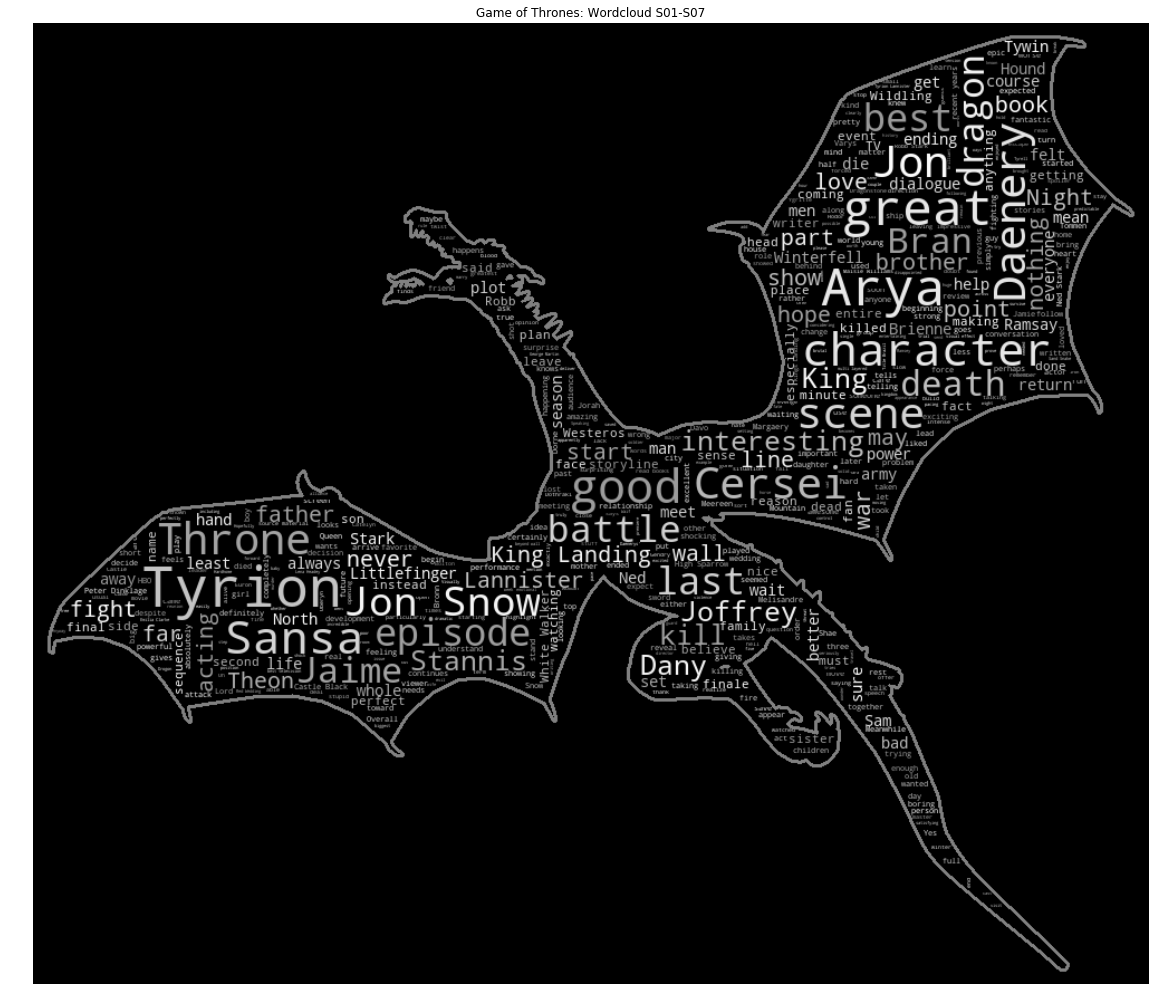

In [8]:
b7=bigdd.query('SE != 8') #s01-s07 review texts
text = " ".join(review for review in b7.content)
got_mask = np.array(Image.open("dragon1.png"))
    
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
    
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["go","season","character","even","one","scene","left","something","little","seem","like",
                  "now","see","much","know","make","still","got","story","really","think","made","way",
                 "will","thing","time","finally","say","book","serie","how","scene","people","end",
                 "going","want","episode","show","bit","find","things","yet","many","next",
                 "character","come","back","another","look","moment","first","another","get","need","give",
                  "seems","episode","feel","us","tell","told","though","two","right","lot","action","show",
                 "every","makes","scene","series","become","everything","watch","new","saw","long","quite",
                  "take","without","probably","continue","almost","different","viewer","seeing",
                  "although","comes","seen","given","poing","might","can","work","word","happen","actually",
                 "around","keep","happened","week","character","already","well","thought","moments",
                  "game","throne"])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=800, stopwords=stopwords, mask=got_mask,
                      contour_width=2.5,contour_color='grey',background_color="black",
                      ).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title("Game of Thrones: Wordcloud S01-S07")
plt.axis("off")
plt.show()

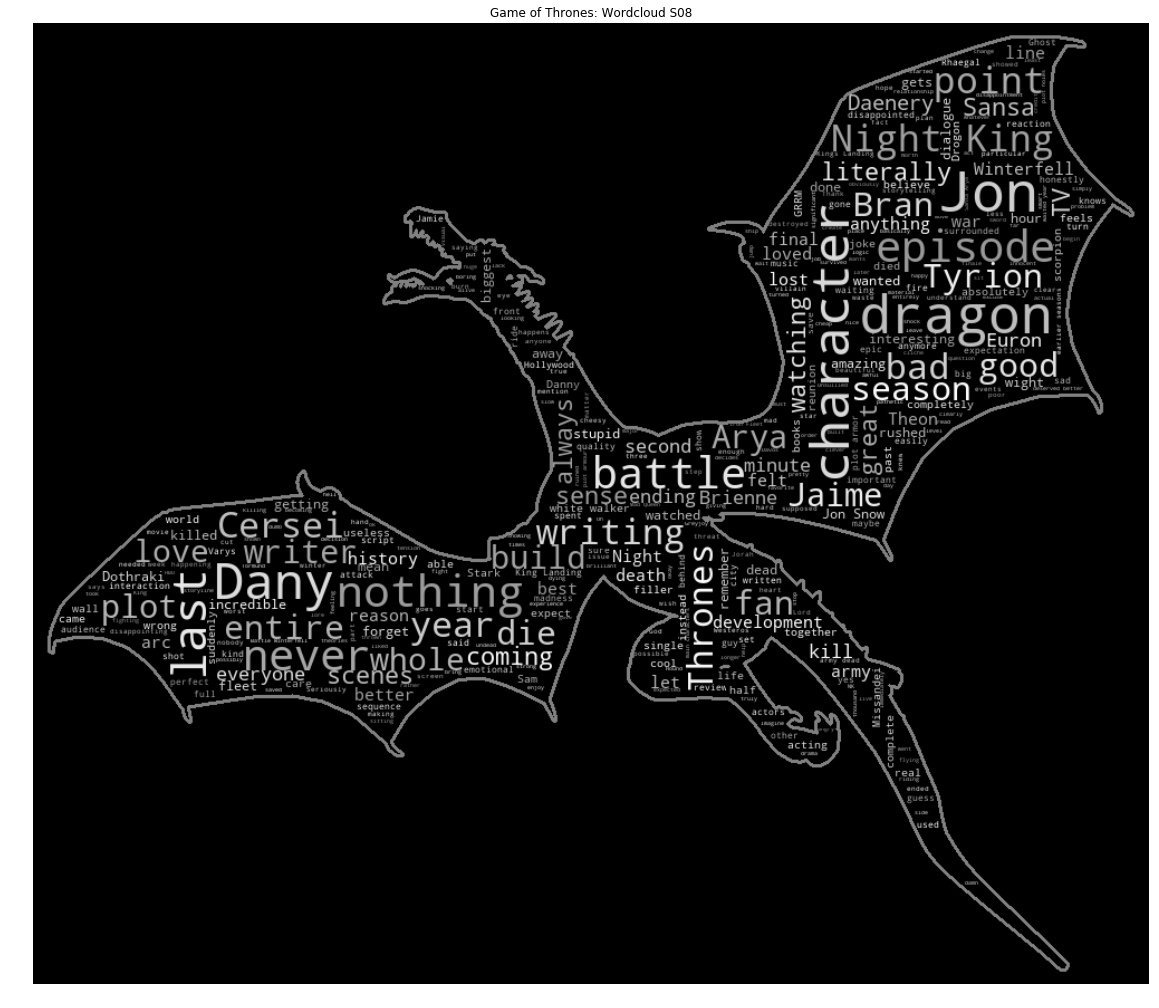

In [10]:
b8=bigdd.query('SE == 8') #s08 review texts
text = " ".join(review for review in b8.content)

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=800, stopwords=stopwords, mask=got_mask,
                      contour_width=2.5,contour_color='grey',background_color="black",
                      ).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title("Game of Thrones: Wordcloud S08")
plt.axis("off")
plt.show()

## The following work is to rank the ratings and number of ratings for all episodes. 
To make it easier to read, we group-color each season.
We can see that, season 8, wins the mostly-rating season. However, unfortunately and unsurprisingly, it is also the worst-rating season.
S06E09, "Battle of the bastards" and S03E09 "The rains of castamere" win the best episodes!

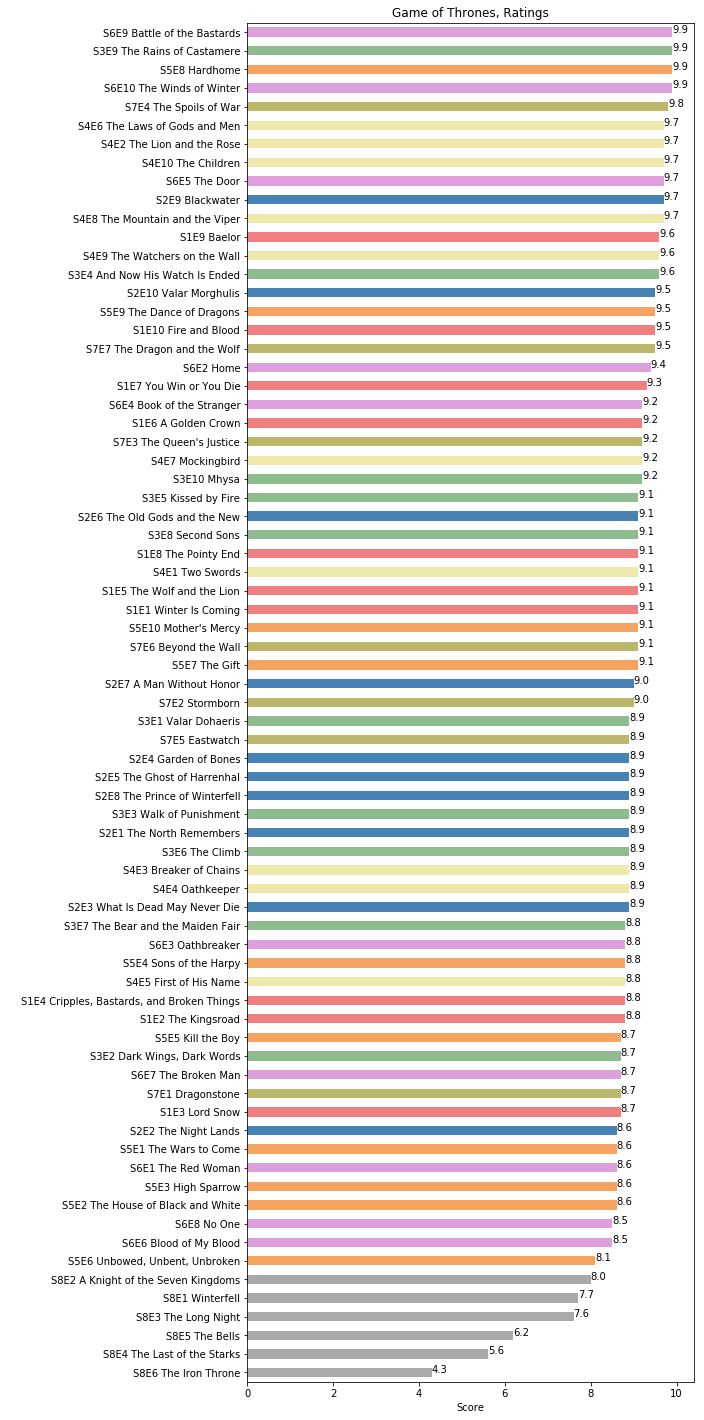

In [11]:
info1=info.sort_values(by="RATING")
%matplotlib inline 
plt.rcParams['figure.figsize'] = [8, 25]

colors = {1:'lightcoral', 2:'steelblue', 3:'darkseagreen', 4:'palegoldenrod',5:'sandybrown',6:'plum',7:'darkkhaki',8:'darkgray'}
cc=info1['SE'].apply(lambda x:colors[x])

pp=info1.plot("EP_TITLE","RATING",kind="barh",color=cc,legend=None)
pp.set_xlabel("Score")
pp.set_ylabel(" ")
pp.set_title("Game of Thrones, Ratings")
for i, v in enumerate(info1.RATING):
    plt.text(v, i, str(round(v, 2)))


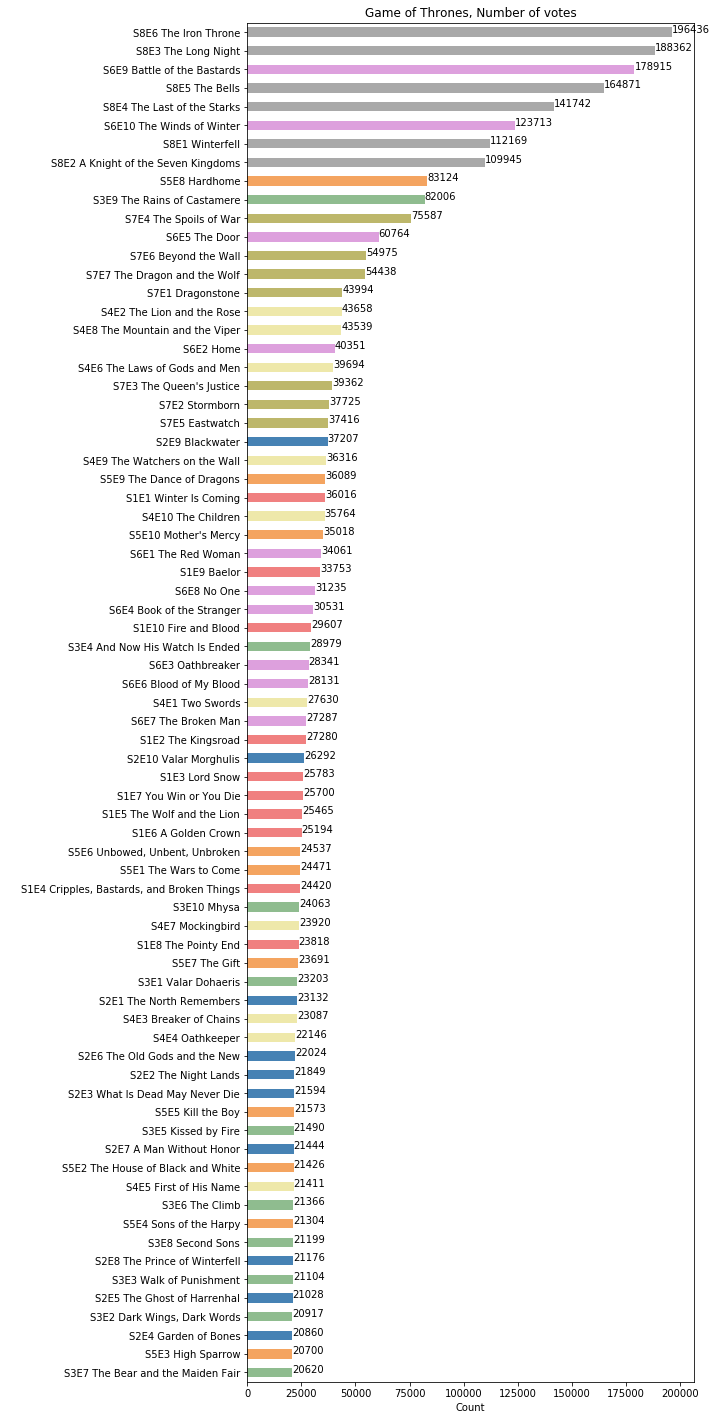

In [12]:
info2=info.sort_values(by="VOTES")
%matplotlib inline 
plt.rcParams['figure.figsize'] = [8, 25]
cc2=info2['SE'].apply(lambda x:colors[x])
pp2=info2.plot("EP_TITLE","VOTES",kind="barh",color=cc2,legend=None)
pp2.set_xlabel("Count")
pp2.set_ylabel(" ")
pp2.set_title("Game of Thrones, Number of votes")
for i, v in enumerate(info2.VOTES):
    plt.text(v, i, str(round(v, 1)))
